In [42]:
# Necessary libraries 
import SimpleITK as sitk
import skimage as skimg
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import dicom2nifti
import os 
import fnmatch


In [99]:
# Hard-coded variables

ref_img_path      =        '/Users/lalith/Documents/PANDA-gradient-images/Gradient-image-37.nii'
grad_img_path     =        '/Users/lalith/Documents/PANDA-gradient-images/'
src_se_list       =        []
epsilon           =        1
total_num_files   =        (len(fnmatch.filter(os.listdir(grad_img_path), '*.nii')))
pet_frames        =        np.arange(1,total_num_files+1)

In [112]:
# The part that measures shannon-entropy for structural finger-printing

itk_fixed=sitk.ReadImage(ref_img_path)
for x in tqdm(range(1,(total_num_files+1))):
    pass
    itk_moved=sitk.ReadImage(grad_img_path+'/Gradient-image-'+str(x)+'.nii');
    moved_img= sitk.GetArrayFromImage(itk_moved)
    fixed_img=sitk.GetArrayFromImage(itk_fixed)
    ssim_3d_sk = skimg.measure.compare_ssim(moved_img, fixed_img, multichannel=False, gaussian_weights=True, data_range=1.0, use_sample_covariance=False)
    nrmse=skimg.measure.compare_nrmse(moved_img,fixed_img)
    src_se=skimg.measure.shannon_entropy(moved_img, base=2)
    src_se_list.append(src_se)
    ref_se=skimg.measure.shannon_entropy(fixed_img, base=2)
    
src_shannon_val                             =     np.array(src_se_list)
ref_shannon_val                             =     np.array(ref_se)
similarity_shannon                          =     np.array(abs(ref_shannon_val-src_shannon_val))
selected_frames                             =     similarity_shannon<epsilon # Lesser it is better similarity
frames_where_gans_can_be_applied            =     np.where(selected_frames==True)


  0%|          | 0/37 [00:00<?, ?it/s]/Users/lalith/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/simple_metrics.py:96: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(compare_mse(im_true, im_test)) / denom
100%|██████████| 37/37 [02:48<00:00,  4.56s/it]


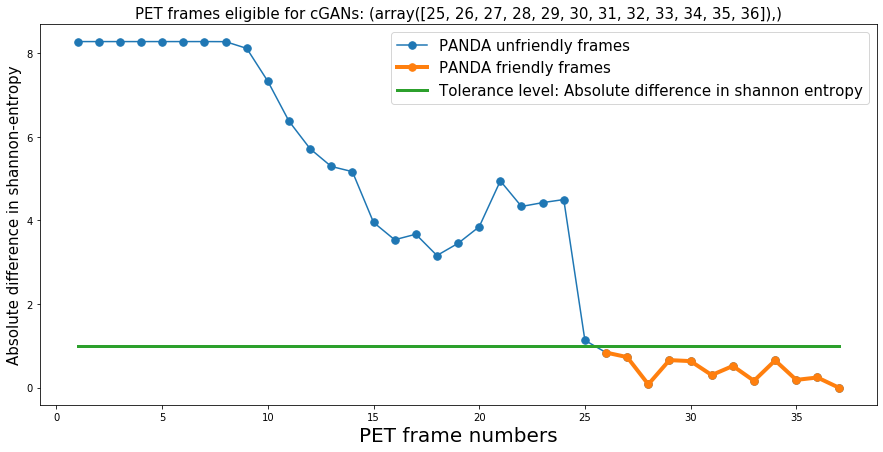

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

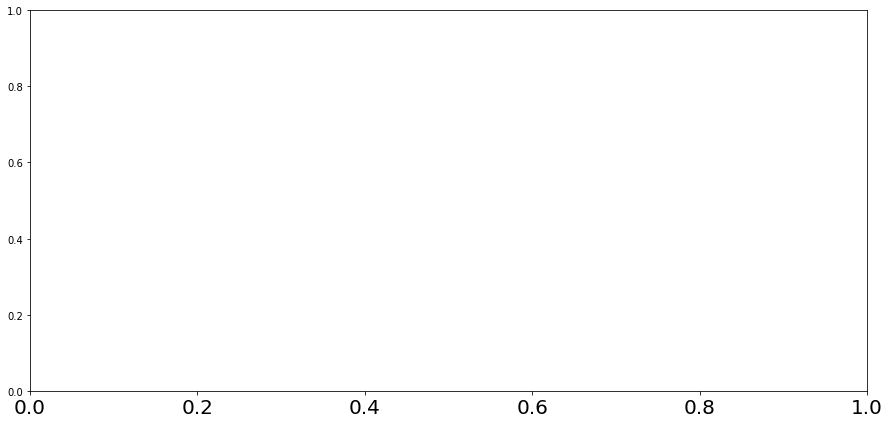

In [161]:
# Plot them all.
plt.rcParams['figure.figsize'] = [15, 7]
plt.title('PET frames eligible for cGANs: '+ str(frames_where_gans_can_be_applied),size=15)
plt.plot(pet_frames,similarity_shannon,'.-',markersize=15,label='PANDA unfriendly frames')
plt.plot(pet_frames[selected_frames],similarity_shannon[selected_frames],'.-',linewidth=4,markersize=15,label='PANDA friendly frames')
plt.plot(pet_frames,np.ones(total_num_files),linewidth=3,label='Tolerance level: Absolute difference in shannon entropy')
plt.xlabel('PET frame numbers',size=20)
plt.ylabel('Absolute difference in shannon-entropy', size=15)
plt.legend(loc="upper right",prop={"size":15})
plt.show()
plt.xticks(fontsize=20)